## Partial Least Square

In [97]:
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection

In [98]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [99]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [100]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

### Predict

In [101]:
pls_model

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [102]:
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [103]:
y_pred = pls_model.predict(X_train)

In [104]:
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [105]:
r2_score(y_train, y_pred)

0.5140424486535482

In [106]:
y_pred = pls_model.predict(X_test)

In [107]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

### Model Tuning

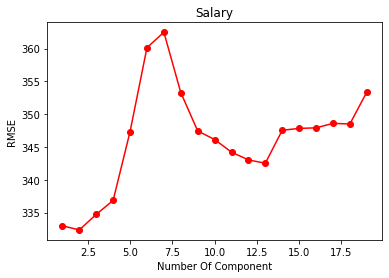

In [108]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Loop For error calculate
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Visualizing
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-o', c = "r")
plt.xlabel('Number Of Component')
plt.ylabel('RMSE')
plt.title('Salary');

In [109]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [110]:
y_pred = pls_model.predict(X_test)

In [111]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526